<a href="https://colab.research.google.com/github/wojciechsadlik/MGU-CGANMusicConverter/blob/main/music_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Genre Classifier Based on gtzan 30 sec

Dataset: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

In [1]:
import librosa
import numpy as np
import os
import tensorflow as tf
import sklearn.preprocessing
import sklearn.model_selection
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CSV_PATH = './gtzan_dataset/features_30_sec.csv'
csv_frame = pd.read_csv(CSV_PATH)

csv_frame = csv_frame.drop('filename', axis=1)
csv_frame = csv_frame.drop('length', axis=1)

labels = csv_frame.pop('label')

data = csv_frame.to_numpy()
labels = labels.to_numpy()

In [3]:
label_binarizer = sklearn.preprocessing.LabelBinarizer()

labels = label_binarizer.fit_transform(labels)

In [4]:
standard_scaler = sklearn.preprocessing.StandardScaler()

data = standard_scaler.fit_transform(data)

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, labels, test_size=0.25)

In [6]:
print(labels, labels.shape)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]] (1000, 10)


In [7]:
print(data, data.shape)

[[-0.35013678  0.31258717 -0.01068969 ... -0.30059734  0.60406407
  -0.51298758]
 [-0.46248155  1.11757233 -0.53285232 ... -0.40708699  0.42412706
  -0.53842129]
 [-0.18422456 -0.13770124  0.67997762 ... -0.52729705 -0.29618888
  -0.8749539 ]
 ...
 [ 0.65463736 -1.43198917 -0.75062494 ... -0.63865065 -0.26361549
  -0.89060474]
 [-0.19833855  0.66814351 -0.71697762 ... -0.5114848  -0.65064889
  -0.63768256]
 [-0.2483391  -0.05894495 -1.1648952  ...  0.16033426  0.5868411
  -0.4526752 ]] (1000, 57)


In [8]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data, labels, test_size=0.25)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               29696     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=2, validation_data=(X_test, y_test))

Epoch 1/200
6/6 - 0s - loss: 2.2608 - accuracy: 0.1560 - val_loss: 2.1145 - val_accuracy: 0.3440
Epoch 2/200
6/6 - 0s - loss: 2.0520 - accuracy: 0.3027 - val_loss: 1.8525 - val_accuracy: 0.3600
Epoch 3/200
6/6 - 0s - loss: 1.8764 - accuracy: 0.3360 - val_loss: 1.6469 - val_accuracy: 0.4040
Epoch 4/200
6/6 - 0s - loss: 1.7220 - accuracy: 0.3987 - val_loss: 1.4776 - val_accuracy: 0.4400
Epoch 5/200
6/6 - 0s - loss: 1.5971 - accuracy: 0.4227 - val_loss: 1.3863 - val_accuracy: 0.4880
Epoch 6/200
6/6 - 0s - loss: 1.4799 - accuracy: 0.4667 - val_loss: 1.2992 - val_accuracy: 0.5120
Epoch 7/200
6/6 - 0s - loss: 1.4289 - accuracy: 0.4840 - val_loss: 1.2287 - val_accuracy: 0.5600
Epoch 8/200
6/6 - 0s - loss: 1.3298 - accuracy: 0.5293 - val_loss: 1.1718 - val_accuracy: 0.5920
Epoch 9/200
6/6 - 0s - loss: 1.2676 - accuracy: 0.5213 - val_loss: 1.1313 - val_accuracy: 0.6200
Epoch 10/200
6/6 - 0s - loss: 1.1820 - accuracy: 0.5907 - val_loss: 1.0570 - val_accuracy: 0.6440
Epoch 11/200
6/6 - 0s - loss:

Epoch 85/200
6/6 - 0s - loss: 0.0580 - accuracy: 0.9893 - val_loss: 1.6096 - val_accuracy: 0.7200
Epoch 86/200
6/6 - 0s - loss: 0.0469 - accuracy: 0.9867 - val_loss: 1.7545 - val_accuracy: 0.7400
Epoch 87/200
6/6 - 0s - loss: 0.0365 - accuracy: 0.9907 - val_loss: 1.7472 - val_accuracy: 0.7280
Epoch 88/200
6/6 - 0s - loss: 0.0632 - accuracy: 0.9840 - val_loss: 1.6847 - val_accuracy: 0.7400
Epoch 89/200
6/6 - 0s - loss: 0.0416 - accuracy: 0.9893 - val_loss: 1.6797 - val_accuracy: 0.7560
Epoch 90/200
6/6 - 0s - loss: 0.0447 - accuracy: 0.9880 - val_loss: 1.6770 - val_accuracy: 0.7320
Epoch 91/200
6/6 - 0s - loss: 0.0500 - accuracy: 0.9840 - val_loss: 1.6210 - val_accuracy: 0.7360
Epoch 92/200
6/6 - 0s - loss: 0.0483 - accuracy: 0.9907 - val_loss: 1.5671 - val_accuracy: 0.7400
Epoch 93/200
6/6 - 0s - loss: 0.0537 - accuracy: 0.9853 - val_loss: 1.5749 - val_accuracy: 0.7360
Epoch 94/200
6/6 - 0s - loss: 0.0343 - accuracy: 0.9920 - val_loss: 1.5989 - val_accuracy: 0.7440
Epoch 95/200
6/6 - 0

Epoch 168/200
6/6 - 0s - loss: 0.0210 - accuracy: 0.9947 - val_loss: 2.0235 - val_accuracy: 0.6960
Epoch 169/200
6/6 - 0s - loss: 0.0173 - accuracy: 0.9947 - val_loss: 2.0686 - val_accuracy: 0.7000
Epoch 170/200
6/6 - 0s - loss: 0.0278 - accuracy: 0.9920 - val_loss: 2.0478 - val_accuracy: 0.6960
Epoch 171/200
6/6 - 0s - loss: 0.0202 - accuracy: 0.9933 - val_loss: 1.9987 - val_accuracy: 0.7040
Epoch 172/200
6/6 - 0s - loss: 0.0121 - accuracy: 0.9973 - val_loss: 1.9870 - val_accuracy: 0.7080
Epoch 173/200
6/6 - 0s - loss: 0.0146 - accuracy: 0.9947 - val_loss: 1.9836 - val_accuracy: 0.7040
Epoch 174/200
6/6 - 0s - loss: 0.0083 - accuracy: 0.9973 - val_loss: 1.9959 - val_accuracy: 0.7200
Epoch 175/200
6/6 - 0s - loss: 0.0214 - accuracy: 0.9933 - val_loss: 2.0106 - val_accuracy: 0.7160
Epoch 176/200
6/6 - 0s - loss: 0.0133 - accuracy: 0.9960 - val_loss: 2.0316 - val_accuracy: 0.7160
Epoch 177/200
6/6 - 0s - loss: 0.0087 - accuracy: 0.9973 - val_loss: 2.0527 - val_accuracy: 0.7080
Epoch 178/

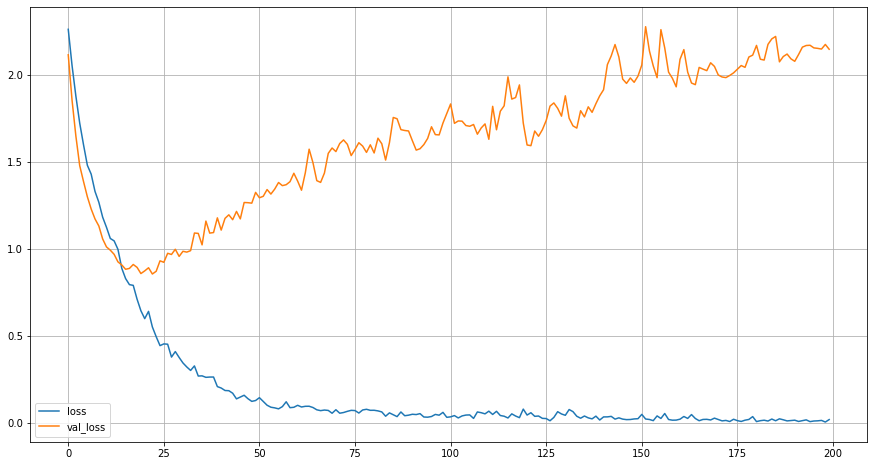

In [12]:
plt.figure(figsize=(15,8))
pd.DataFrame(history.history)['loss'].plot()
pd.DataFrame(history.history)['val_loss'].plot()
plt.grid()
plt.legend()
plt.show()

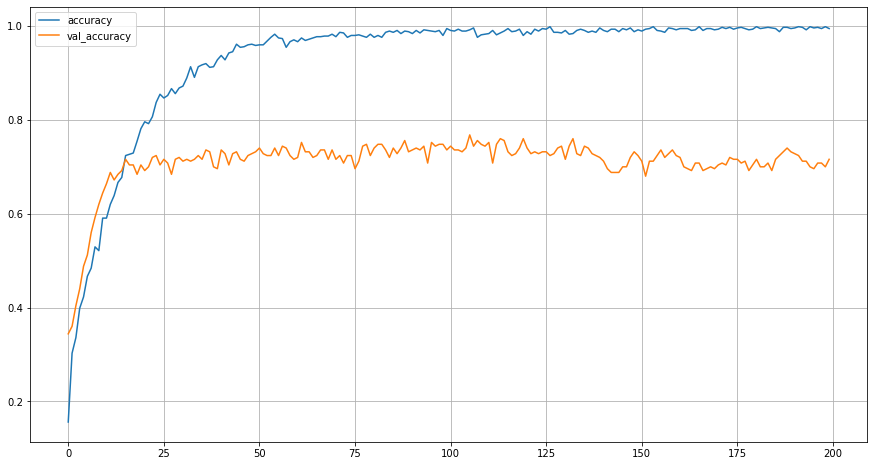

In [13]:
plt.figure(figsize=(15,8))
pd.DataFrame(history.history)['accuracy'].plot()
pd.DataFrame(history.history)['val_accuracy'].plot()
plt.grid()
plt.legend()
plt.show()